***

## Import Packages

<br>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
# Import train and test split
from sklearn.model_selection import train_test_split

# Improt preprocessing module
from sklearn import preprocessing

# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import cross-validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Import metrics for model performance
from sklearn.metrics import mean_squared_error, r2_score

# Import module for storing arrays
import joblib

***

## Step 3: Load Dataset from file in Repository

<br>

In [69]:
data_1 = pd.read_csv('winequality-red.csv')

In [70]:
#print(data_1.head())

***

### Remove Semicolons from the data

<br>

In [71]:
data_5 = pd.read_csv('winequality-red.csv', sep=';')

#print(data_5.head)

***

### Check out the shape and summary statistics of the data

<br>

In [72]:
print(data_5.shape)

(1599, 12)


In [73]:
print(data_5.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

***

## Create groups of 'quantity' values as either 'bad' or good'

In [74]:
#bins will set the limits for the classification.
bins = (3, 6, 8) #qualities ranging from 3–6 are classified as bad and 6–8 as good
group_names = [0, 1]
data_5['quality'] = pd.cut(data_5['quality'], bins = bins, labels = group_names)
data_5['quality'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: category
Categories (2, int64): [0 < 1]

In [75]:
pd.set_option('display.max_rows', 5000)

In [76]:
data_5['quality'] = pd.get_dummies(data_5['quality'],drop_first=True)
data_5['quality'][:5]

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: uint8

In [77]:
data_5['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

***

## Step 4: Split data into training and test sets

<br>

In [78]:
y = data_5.quality
X = data_5.drop('quality', axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

***

## Fit the transformer on the training set 

<br>

#### Fitting the Transformer API

In [80]:
scaler = preprocessing.StandardScaler().fit(X_train)

***

## Step 5: Declare data preprocessing steps

<br>

#### Applying transformer to training data

In [81]:
X_train_scaled = scaler.transform(X_train)
 
print(X_train_scaled.mean(axis=0))

[ 6.03461334e-16  7.22209192e-17  4.02770511e-17  8.33318298e-17
  7.49986469e-17  4.99990979e-17  1.45830702e-17  3.65035081e-14
 -3.90131850e-15 -5.81933945e-16 -4.55547336e-16]


In [82]:
print(X_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Applying transformer to test data

In [83]:
X_test_scaled = scaler.transform(X_test)
 
print(X_test_scaled.mean(axis=0))

[ 0.06403778 -0.02673527  0.02412188 -0.0030829  -0.08793862  0.12069338
  0.07658711  0.06723619 -0.06274397 -0.04796901 -0.0242342 ]


In [84]:
print(X_test_scaled.std(axis=0))

[1.00072563 0.96844741 0.97707854 0.9749907  0.84353034 1.13110745
 1.03120342 0.97616286 0.90026362 0.9082083  0.96445576]


#### Piplelne with preprocessing and model

In [85]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

***

## Step 6: Declare hyperparameters to tune.

<br>

#### We can list the tunable hyperparameters like so

In [86]:
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomforestregressor': RandomForestRegressor(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomforestregressor__bootstrap': True, 'randomforestregressor__ccp_alpha': 0.0, 'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_leaf_nodes': None, 'randomforestregressor__max_samples': None, 'randomforestregressor__min_impurity_decrease': 0.0, 'randomforestregressor__min_impurity_split': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_weight_fraction_leaf': 0.0, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__n_jobs': None, 'randomforestregressor__oob_score': F

#### Now, let's declare the hyperparameters we want to tune through cross-validation.

In [87]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

***

## Step 7: Tune model using a cross-validation pipeline.

In [88]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [89]:
print(clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt'}


***

## Step 8: Refit on the entire training set

<br>

In [90]:
print(clf.refit)
# True

True


***

## Step 9: Evaluate model pipeline on test data

<br>

In [91]:
y_pred = clf.predict(X_test)

In [92]:
print(r2_score(y_test, y_pred))
# 0.45044082571584243
 
print(mean_squared_error(y_test, y_pred))
# 0.35461593750000003

0.4264662916631685
0.0667125


In [93]:
X_train.shape

(1279, 11)

In [94]:
y_train.shape

(1279,)

In [95]:
X_test.shape

(320, 11)

In [96]:
y_test.shape

(320,)

In [97]:
from sklearn.metrics import classification_report

In [98]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       277
           1       0.89      0.37      0.52        43

    accuracy                           0.91       320
   macro avg       0.90      0.68      0.74       320
weighted avg       0.91      0.91      0.89       320



In [100]:
import seaborn as sns

<Figure size 864x432 with 0 Axes>

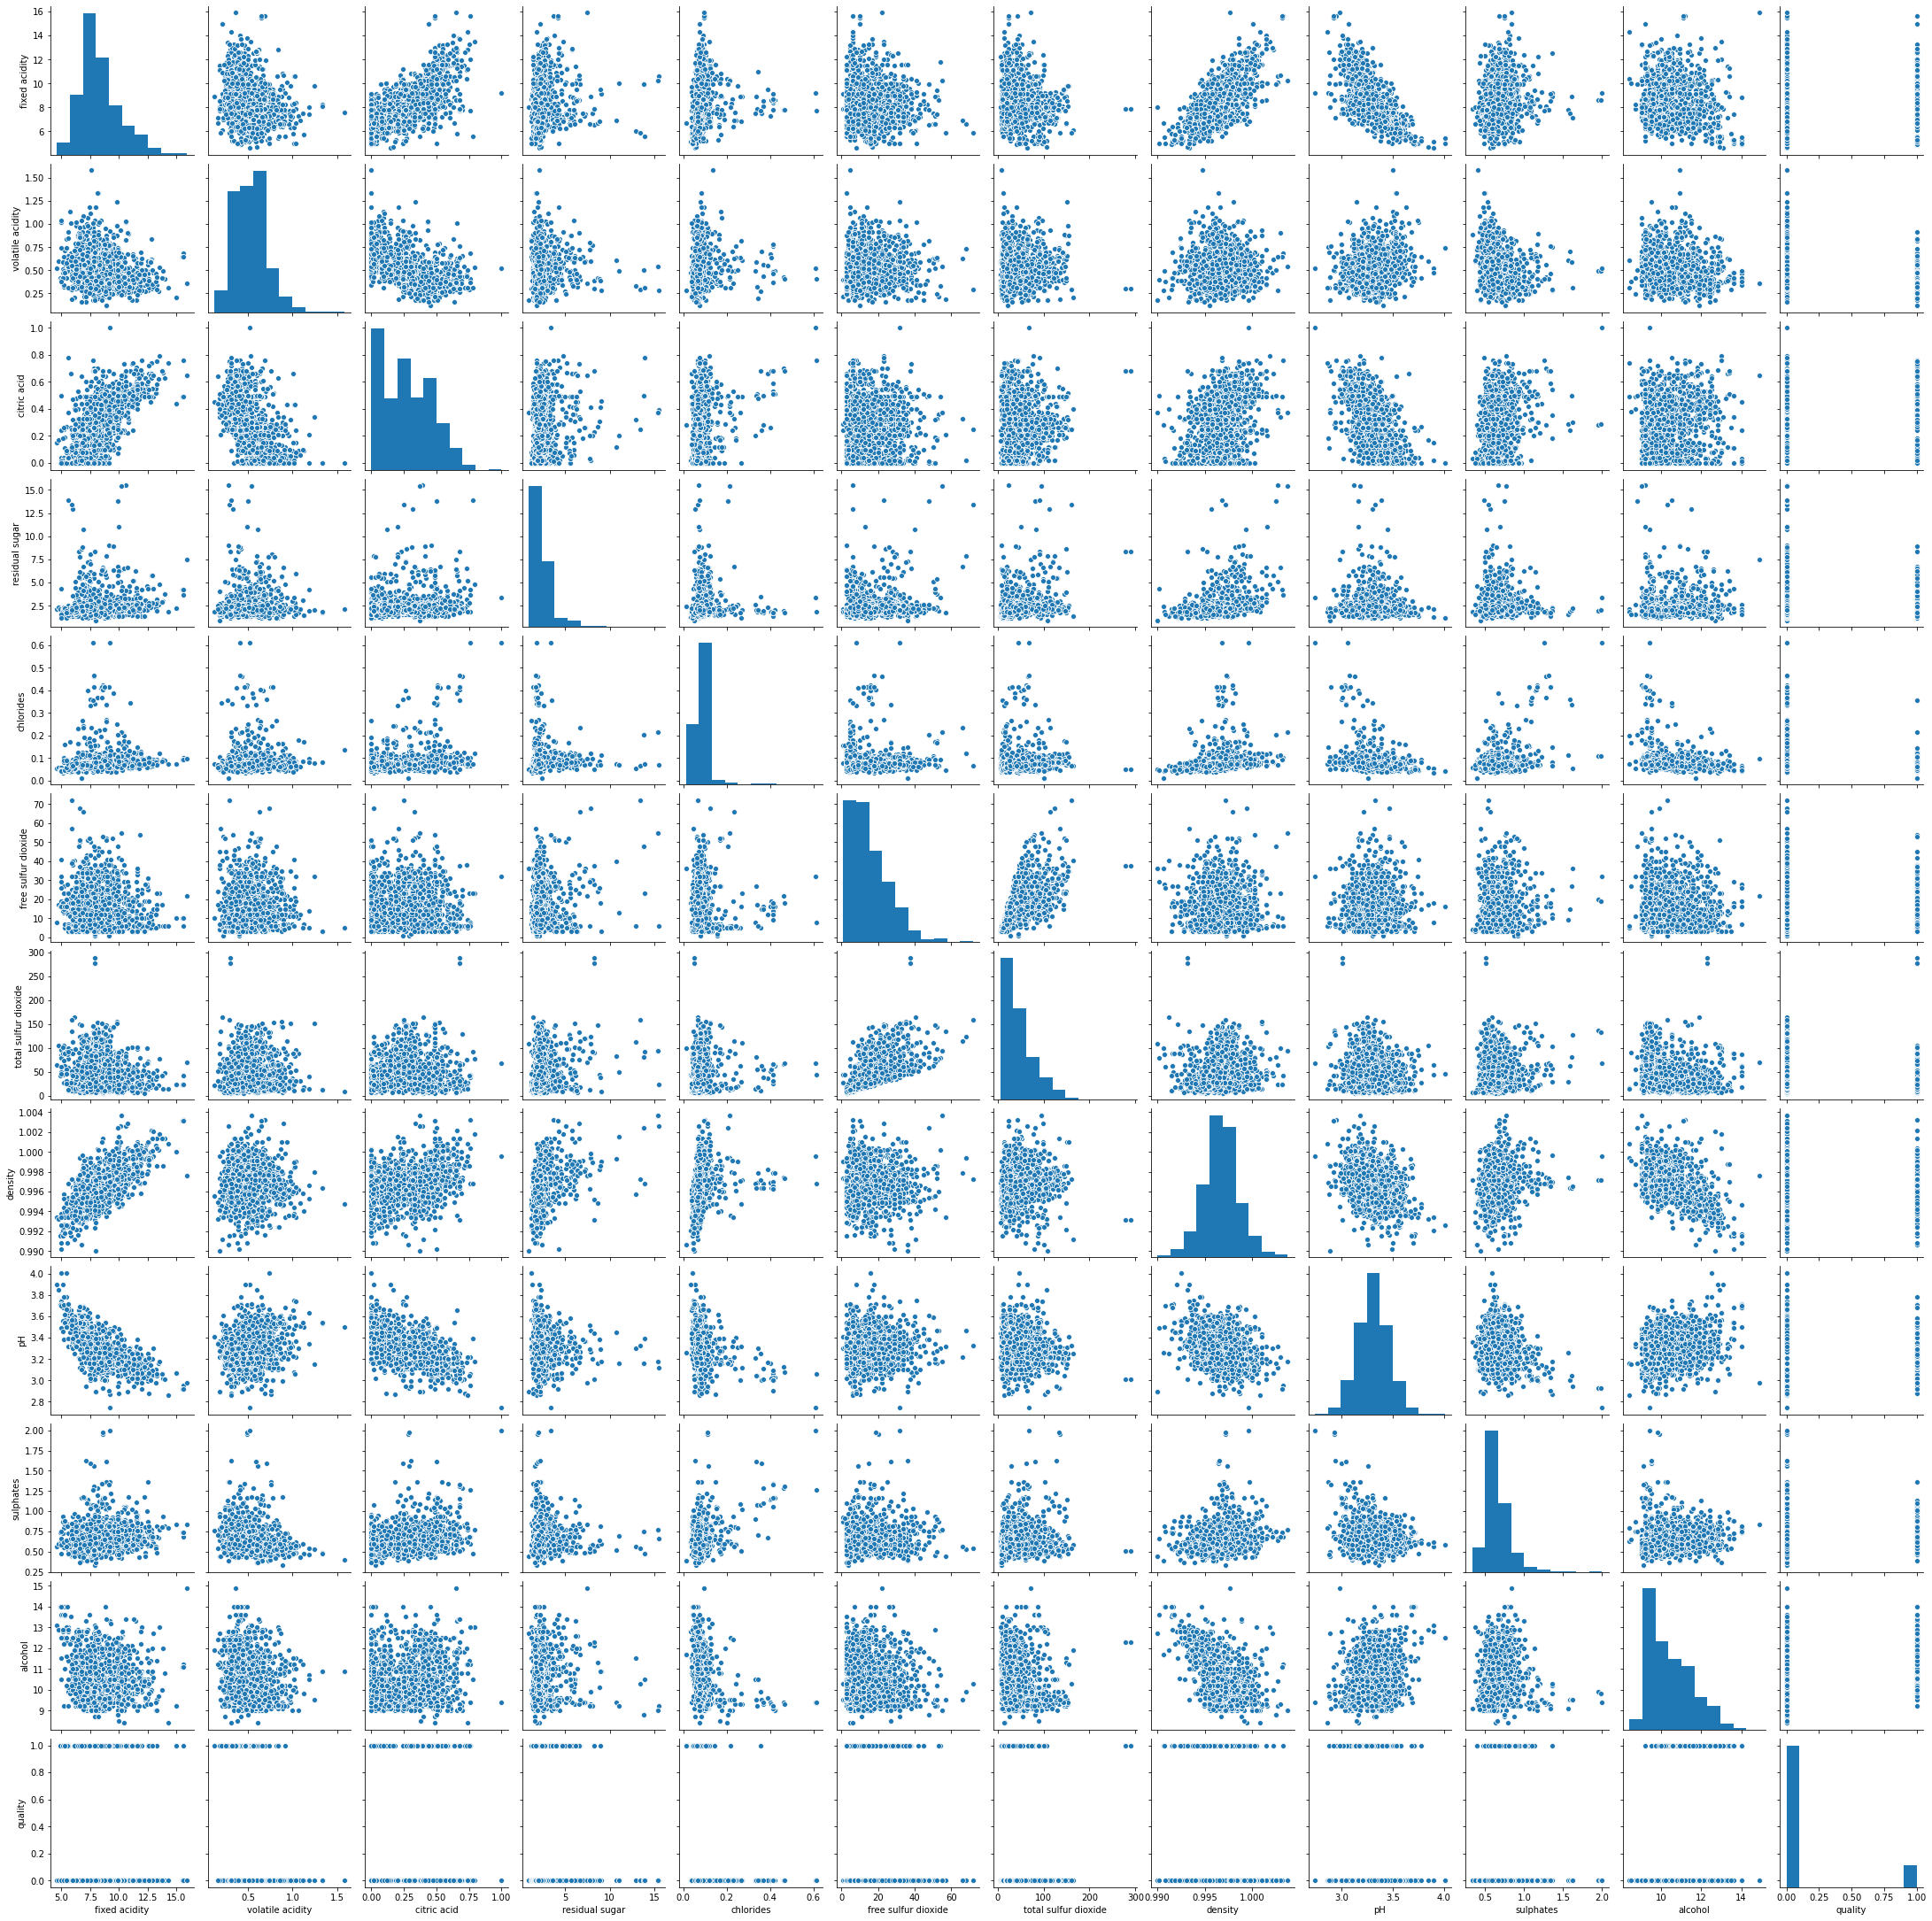

In [101]:
plt.figure(figsize=(12,6))
sns.pairplot(data_5)
plt.show()